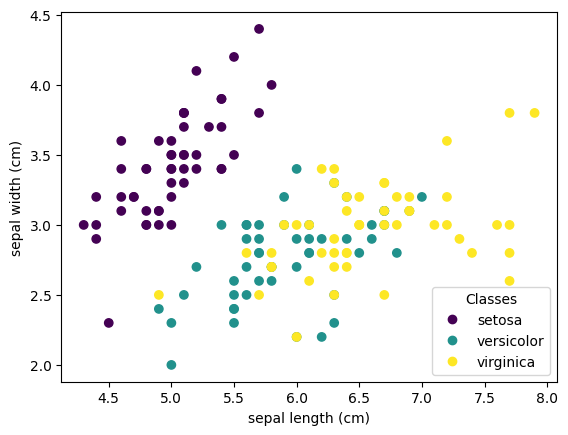

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = datasets.load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

### Классификация алгоритмом k-ближайших соседей

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

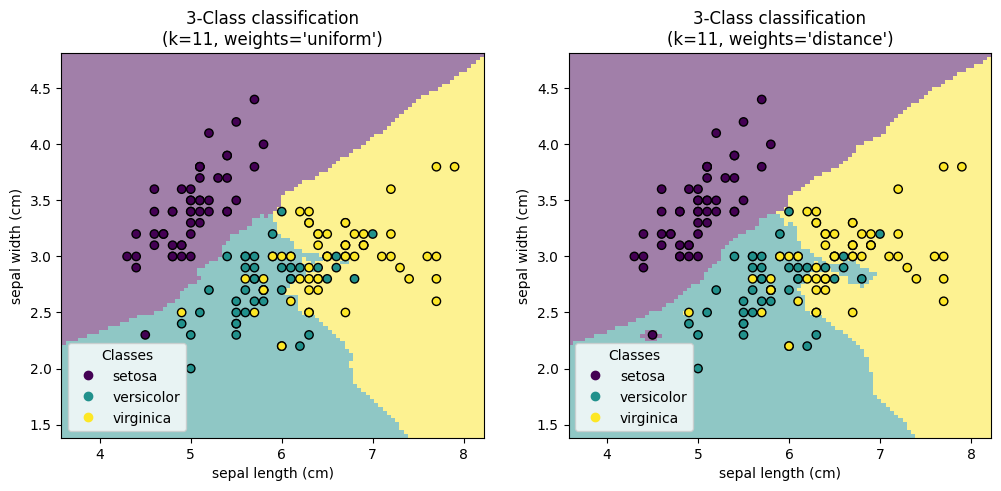

In [4]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

### Классификация алгоритмом "Случайный лес"

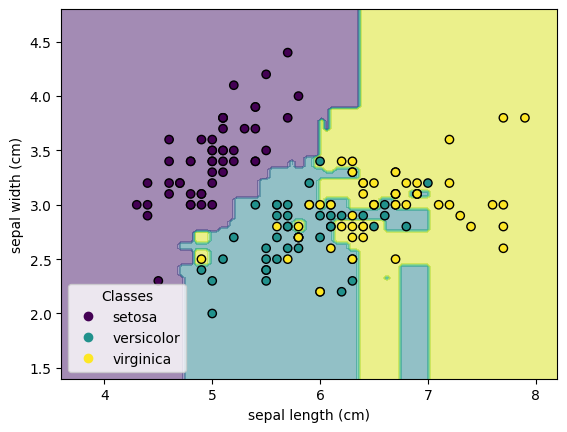

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

iris = datasets.load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

clf = RandomForestClassifier(n_estimators=30)
clf.fit(X_train, y_train)

disp = DecisionBoundaryDisplay.from_estimator(clf, X_test, alpha=0.5)

disp.ax_.legend(
    scatter.legend_elements()[0],
    iris.target_names,
    loc="lower left",
    title="Classes",
)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")

### Классификация машинами опорных векторов (SVM)

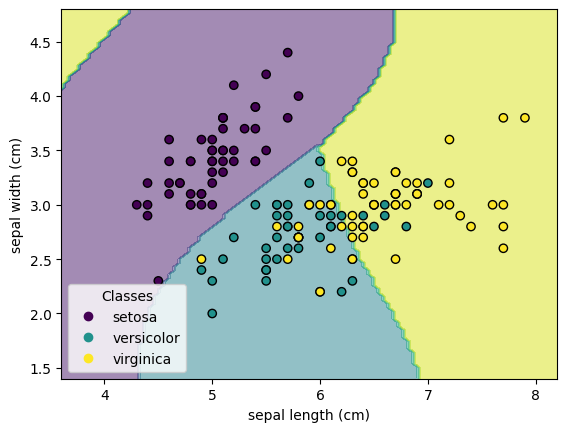

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

svc = svm.SVC(gamma=1)
svc.fit(X_train, y_train)

disp = DecisionBoundaryDisplay.from_estimator(svc, X_test, alpha=0.5)

disp.ax_.legend(
    scatter.legend_elements()[0],
    iris.target_names,
    loc="lower left",
    title="Classes",
)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")

### Кластеризация алгоритмом k-средних

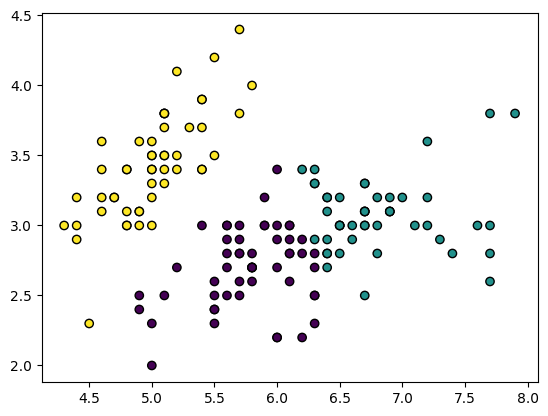

In [59]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
labels = kmeans.labels_

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, edgecolors="k")

### Иерархическая кластеризация методом Уорда

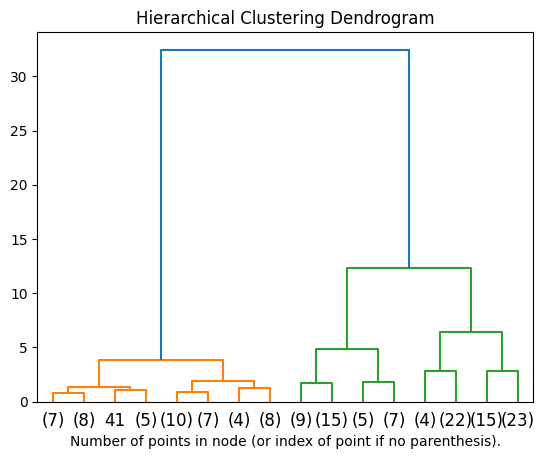

In [60]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Спектральная кластеризация

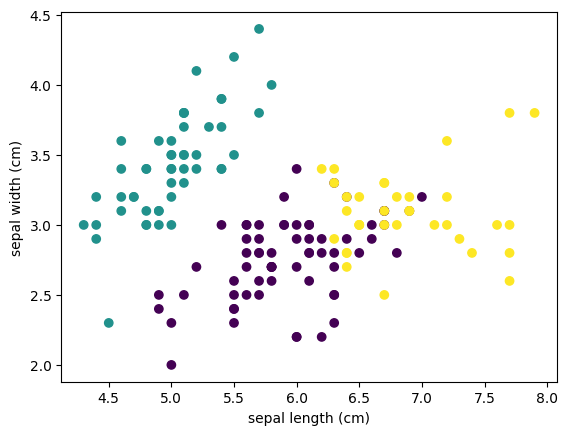

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import SpectralClustering

iris = datasets.load_iris()
X = iris.data
y = iris.target

sc = SpectralClustering(n_clusters=3)
sc.fit(X)

labels = sc.labels_

_, ax = plt.subplots()
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()